<a href="https://www.kaggle.com/code/vikarna/crime-cluster-analysis-k-means?scriptVersionId=94764879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Intro

**Clustering is a broad set of techniques for finding subgroups of observations within a data set.**

**Clustering allows us to identify which observations are alike, and potentially categorize them therein.**

**K-means clustering is the simplest and the most commonly used clustering method for splitting a dataset into a set of k groups.**

In [2]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

Data set contains statistics in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. It includes also the percent of the population living in urban areas

In [3]:
crime <- read.csv('../input/test123/USArrests.csv')
data <- crime

**To perform a cluster analysis , generally, the data should be prepared as follows:**

* Rows are observations (individuals) and columns are variables
* Any missing value in the data must be removed or estimated.
* The data must be standardized (i.e., scaled) to make variables comparable. 

Removing missing values

In [4]:
data <- na.omit(data)

We don’t want the clustering algorithm to depend to an arbitrary variable unit :
we start by scaling/standardizing the data using the R function scale

However we cannot scale all data because for scaling all data must be numeric.However,our dataset contains States column which is 'character'

In [5]:
data <- scale(data)
head(data)

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


We split the dataset into numeric dataframe and character dataframe

In [6]:
#head(df)

df_1 <- data %>% select(c(Murder,Assault,UrbanPop,Rape))

Scaling the numeric columns dataframe

In [7]:
df_1 <- scale(df_1)
head(df_1)

,Murder,Assault,UrbanPop,Rape
1,1.24256408,0.7828393,-0.5209066,-0.003416473
2,0.50786248,1.1068225,-1.2117642,2.484202941
3,0.07163341,1.4788032,0.9989801,1.042878388
4,0.23234938,0.2308680,-1.0735927,-0.184916602
5,0.27826823,1.2628144,1.7589234,2.067820292
6,0.02571456,0.3988593,0.8608085,1.864967207


we are transforming the dataset into dataframe

In [8]:
df_1 <- as.data.frame(df_1)

We give row numbers to each row since there are 50 rows and 50 rows could be associated with 50 states in Alphabetical order.

In [9]:
df_1$row_num <- seq.int(nrow(df_1)) 
head(df_1)


,Murder,Assault,UrbanPop,Rape,row_num
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.24256408,0.7828393,-0.5209066,-0.003416473,1
2,0.50786248,1.1068225,-1.2117642,2.484202941,2
3,0.07163341,1.4788032,0.9989801,1.042878388,3
4,0.23234938,0.2308680,-1.0735927,-0.184916602,4
5,0.27826823,1.2628144,1.7589234,2.067820292,5
6,0.02571456,0.3988593,0.8608085,1.864967207,6


In [10]:
df_states <- data %>% select(X)
head(df_states)

,X
,<chr>
1,Alabama
2,Alaska
3,Arizona
4,Arkansas
5,California
6,Colorado


In [11]:
df_states$row_num <- seq.int(nrow(df_states)) 
head(df_states)


,X,row_num
,<chr>,<int>
1,Alabama,1
2,Alaska,2
3,Arizona,3
4,Arkansas,4
5,California,5
6,Colorado,6


Below we merge the above two dataframes created with inner join with row_num 

In [12]:
df_total <- merge(df_states,df_1,by = 'row_num')
head(df_total)

,row_num,X,Murder,Assault,UrbanPop,Rape
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
2,2,Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
3,3,Arizona,0.07163341,1.4788032,0.9989801,1.042878388
4,4,Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
5,5,California,0.27826823,1.2628144,1.7589234,2.067820292
6,6,Colorado,0.02571456,0.3988593,0.8608085,1.864967207


We change the names of the columns

In [13]:
colnames(df_total) <- c('id','State','Murder','Assault','Population','Rape')
head(df_total)

,id,State,Murder,Assault,Population,Rape
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
2,2,Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
3,3,Arizona,0.07163341,1.4788032,0.9989801,1.042878388
4,4,Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
5,5,California,0.27826823,1.2628144,1.7589234,2.067820292
6,6,Colorado,0.02571456,0.3988593,0.8608085,1.864967207


The classification of observations into groups requires some methods for computing the distance or the (dis)similarity between each pair of observations.

The choice of distance measures is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters. The classical methods for distance measures are

* Euclidean 
* Manhattan distances

We transform State as index since target variable as otherwise K- means cannot be performed because character datatype is present in the dataframe. For K-means all data must be numeric in values

In [14]:
df <- df_total %>% column_to_rownames(., var = "State")

df <- df %>% select(c(Murder,Assault,Population,Rape))

head(df)

,Murder,Assault,Population,Rape
,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


We can visualize the distance matrix using 

get_dist
fviz_dist

from factoextra package

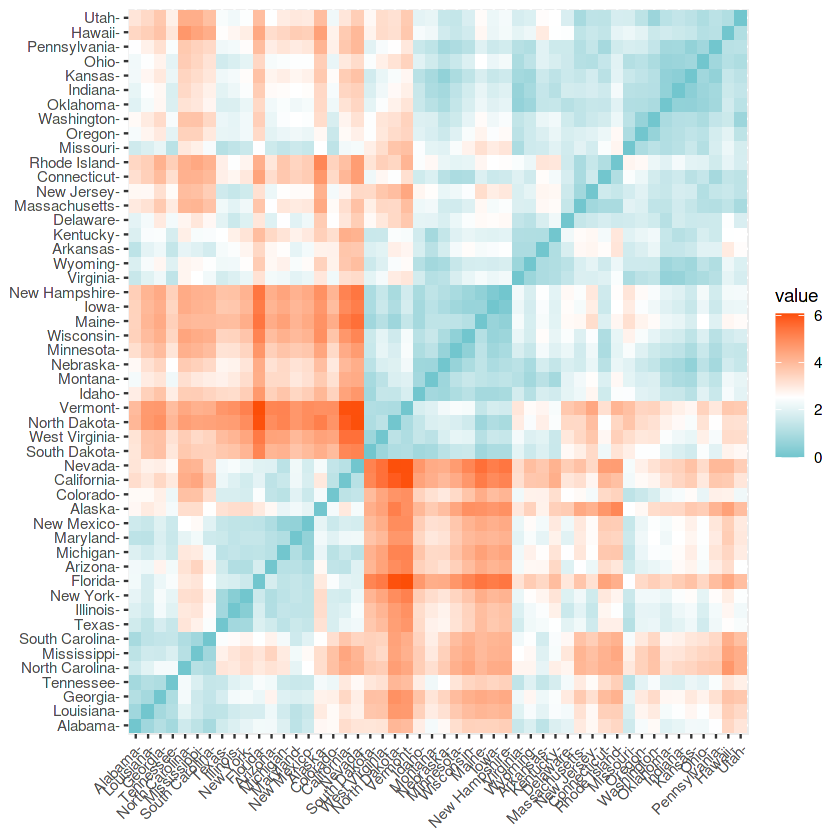

In [15]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))


<img src="./Rplot001.png.jpg">

**K-means Algorithm**
The first step when using k-means clustering is to indicate the number of clusters (k) that will be generated in the final solution.

K-means algorithm can be summarized as follows:

* Specify the number of clusters (K)
* Select randomly k objects from the data set as the initial cluster centers or means
* Assigns each observation to their closest centroid, based on the Euclidean distance between the object and the centroid
* For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster
* iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached.


To determine the o**ptimal number of clusters to be used, there are 3 methods**:

* Elbow method
* Silhouette method
* Gap statistic



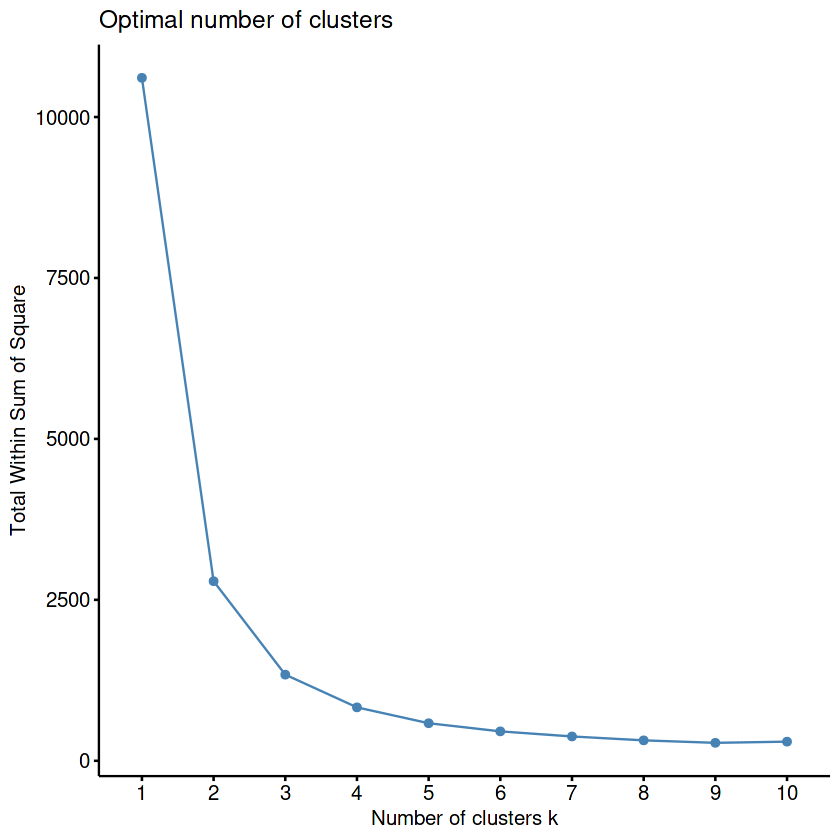

In [16]:
#Elbow method

set.seed(123)

fviz_nbclust(df_1, kmeans, method = "wss")

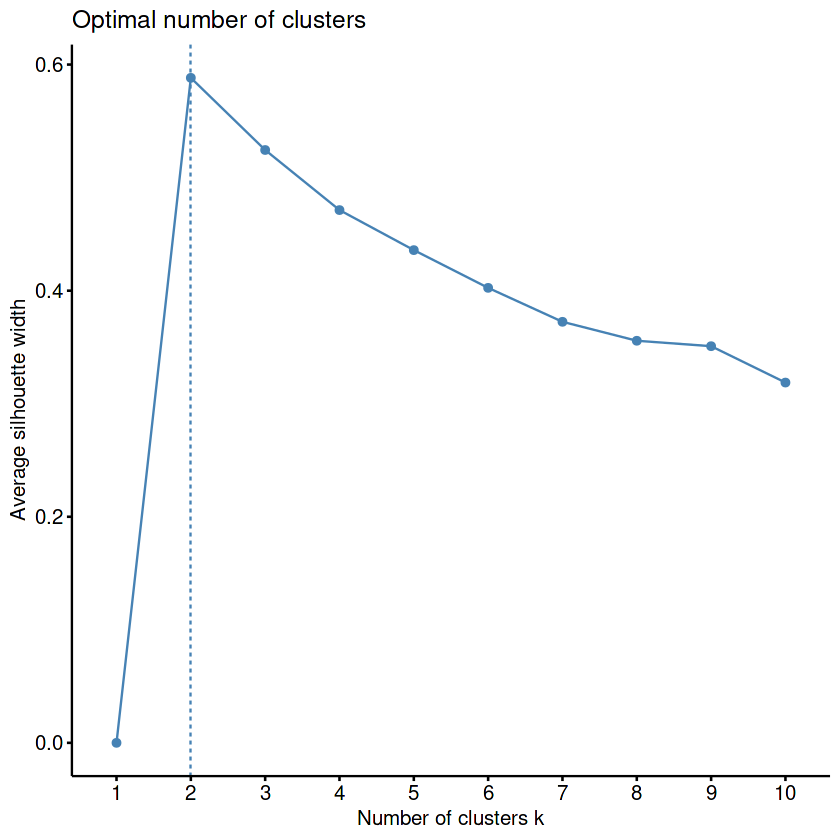

In [17]:
#Sihouette Method

fviz_nbclust(df_1, kmeans, method = "silhouette")

**The gap statistic compares the total intracluster variation for different values of k with their expected values under null reference distribution of the data**

In [18]:
set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.640154 0.1817845 0.04422857
 [2,] 3.135112 3.372283 0.2371717 0.03559601
 [3,] 2.977727 3.233771 0.2560446 0.03749193
 [4,] 2.826221 3.119172 0.2929511 0.04067348
 [5,] 2.738868 3.019965 0.2810969 0.04185469
 [6,] 2.666967 2.930002 0.2630347 0.04105040
 [7,] 2.609895 2.852152 0.2422572 0.04184725
 [8,] 2.539156 2.778562 0.2394054 0.04292750
 [9,] 2.468162 2.711752 0.2435901 0.04344197
[10,] 2.407265 2.647595 0.2403307 0.04548446


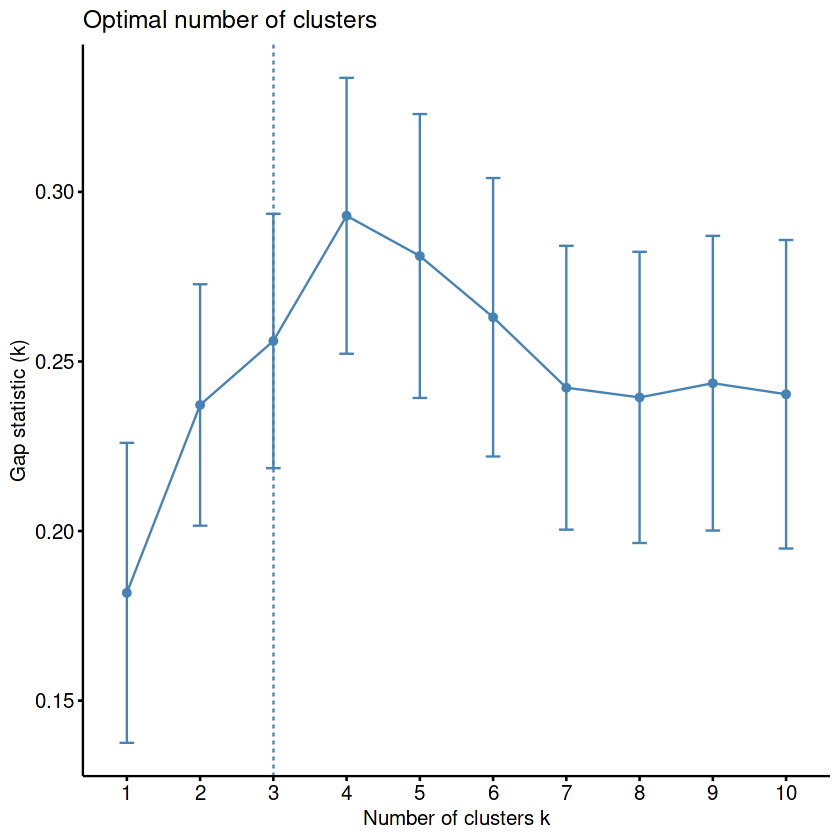

In [19]:
fviz_gap_stat(gap_stat)

**Above steps suggest that 4 is the number of optimal clusters**

In [20]:
set.seed(123)
final <- kmeans(df, 4, nstart = 25)
print(final)

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault Population        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

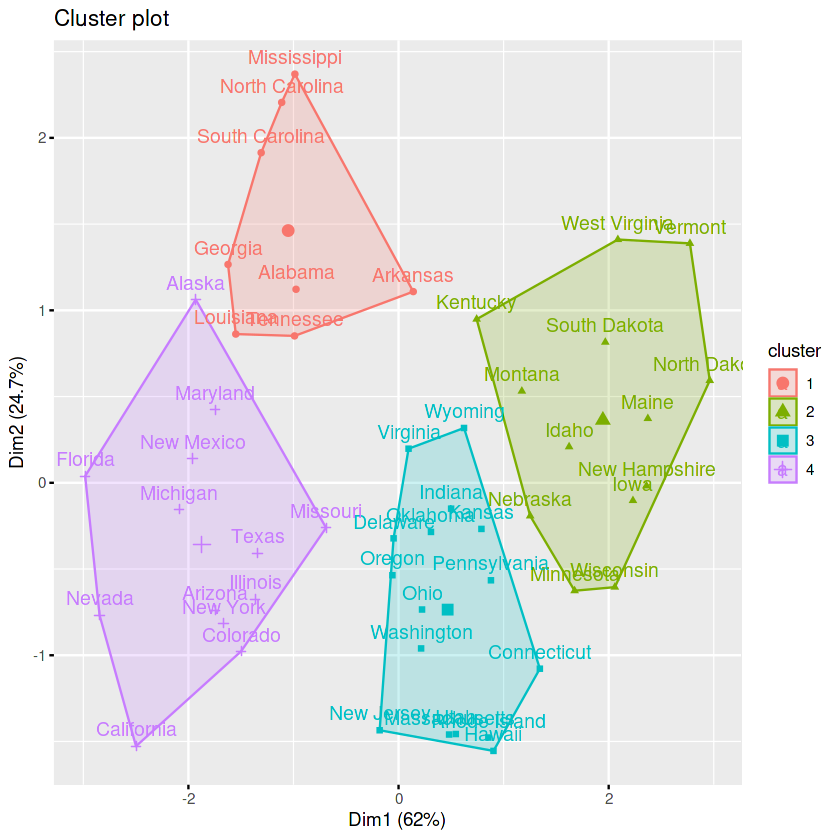

In [21]:
fviz_cluster(final, data = df)

**Descriptive statistics at cluster level**

In [22]:
df %>%
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Murder,Assault,Population,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.4118898,0.8743346,-0.8145211,0.01927104
2,-0.9615407,-1.1066010,-0.9301069,-0.96676331
3,-0.4894375,-0.3826001,0.5758298,-0.26165379
4,0.6950701,1.0394414,0.7226370,1.27693964
